### **Task 2 of Mini Project: Text Classification using Deep Learning**

### 1. **Data Loading**
   - Load the dataset (can be CSV, JSON, or any other format).
   - Perform exploratory data analysis (EDA) to understand class distributions, missing values, etc.
   - Split the dataset into training, validation, and testing sets.

Dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Input (Clothing Description)  1000 non-null   object
 1   Output (Category)             1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB
None

Sample data:
                        Input (Clothing Description)  Output (Category)
0  A loose black linen scarf, designed for both s...  Seasonal (Summer)
1  A loose brown wool skirt, featuring intricate ...            Vintage
2  A flared black denim hoodie, stitched with att...  Seasonal (Winter)
3  A flared pink chiffon t-shirt, stitched with a...            Vintage
4  A baggy red chiffon blazer, featuring intricat...            Vintage


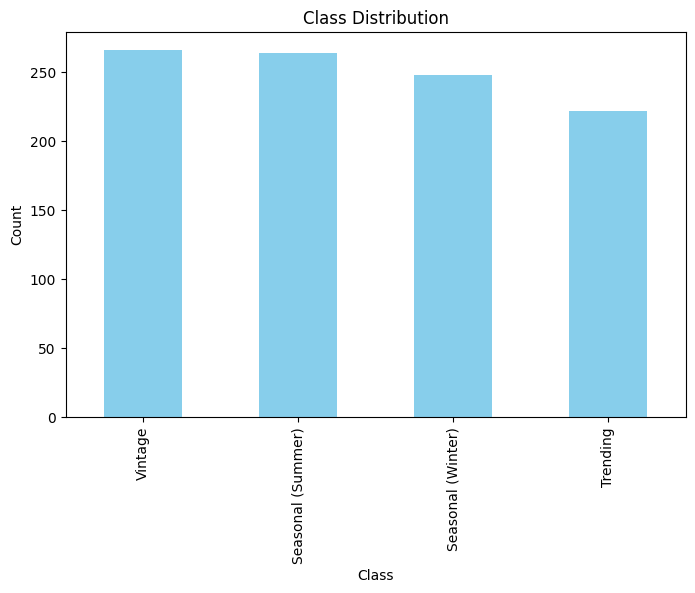

In [1]:
# Install required libraries
!pip install nltk keras gensim scikit-learn


# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Load the dataset
data = pd.read_csv('Fashion_Trend_Cloth_Dataset_Unique.csv')  # Replace with actual dataset path

# Exploratory Data Analysis (EDA)
print("Dataset overview:")
print(data.info())  # Checking for missing values, data types
print("\nSample data:")
print(data.head())  # Display the first few rows

# Plot class distribution
plt.figure(figsize=(8, 5))
data['Output (Category)'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Splitting data into train, validation, and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)


### 2. **Text Processing**
   - Clean the text by removing stop words, punctuation, and special characters.
   - Tokenization: Convert sentences into lists of words/tokens.
   - Optionally, apply stemming or lemmatization to normalize words.

In [2]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Preprocessing function
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply the preprocessing to the dataset
train_data['processed_text'] = train_data['Input (Clothing Description)'].apply(preprocess_text)
val_data['processed_text'] = val_data['Input (Clothing Description)'].apply(preprocess_text)
test_data['processed_text'] = test_data['Input (Clothing Description)'].apply(preprocess_text)

# Check the processed text
print(train_data[['Input (Clothing Description)', 'processed_text']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                          Input (Clothing Description)  \
940  A loose blue denim trench coat, featuring intr...   
547  A slim black chiffon scarf, featuring intricat...   
900  A oversized orange leather hoodie, perfect for...   
603  A fitted yellow wool jeans, stitched with atte...   
348  A flared black wool t-shirt, designed for both...   

                                        processed_text  
940  loose blue denim trench coat featuring intrica...  
547  slim black chiffon scarf featuring intricate d...  
900  oversized orange leather hoodie perfect casual...  
603  fitted yellow wool jeans stitched attention de...  
348  flared black wool shirt designed style functio...  


### 3. **Text Embedding**
   - Implement different types of embeddings for text conversion into numerical form:
     - **Bag of Words (BoW)**: Count-based method for representing text.
     - **TF-IDF**: Weigh terms based on their frequency and importance.
     - **FastText**: Pre-trained word embeddings that capture word meanings.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim

# Bag of Words (BoW)
bow_vectorizer = CountVectorizer(max_features=5000)
X_train_bow = bow_vectorizer.fit_transform(train_data['processed_text']).toarray()
X_val_bow = bow_vectorizer.transform(val_data['processed_text']).toarray()
X_test_bow = bow_vectorizer.transform(test_data['processed_text']).toarray()

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['processed_text']).toarray()
X_val_tfidf = tfidf_vectorizer.transform(val_data['processed_text']).toarray()
X_test_tfidf = tfidf_vectorizer.transform(test_data['processed_text']).toarray()

# FastText (Word Embeddings)
# fasttext_model = gensim.models.FastText(train_data['processed_text'].apply(str.split), vector_size=100, window=5, min_count=5)
# X_train_fasttext = [fasttext_model.wv[text.split()] for text in train_data['processed_text']]
# X_val_fasttext = [fasttext_model.wv[text.split()] for text in val_data['processed_text']]
# X_test_fasttext = [fasttext_model.wv[text.split()] for text in test_data['processed_text']]
tokenized_sentences = train_data['processed_text'].apply(str.split).tolist()

# Train FastText model
fasttext_model = gensim.models.FastText(tokenized_sentences, vector_size=100, window=5, min_count=5)

# Generate FastText embeddings for train, validation, and test data
X_train_fasttext = [fasttext_model.wv[text.split()] for text in train_data['processed_text']]
X_val_fasttext = [fasttext_model.wv[text.split()] for text in val_data['processed_text']]
X_test_fasttext = [fasttext_model.wv[text.split()] for text in test_data['processed_text']]

print("Embedding completed for BoW, TF-IDF, and FastText.")

Embedding completed for BoW, TF-IDF, and FastText.


### 4. **Model Training with Different Architectures**
   - Train deep learning models using the different embeddings:
     - **CNN** (Convolutional Neural Network)
     - **LSTM** (Long Short-Term Memory)
     - **BiLSTM** (Bidirectional LSTM)
     - **CNN-BiLSTM**: A hybrid model

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, Bidirectional, Embedding, Flatten
import numpy as np


# Define a CNN model
def cnn_model(input_dim, model_name):
    print(f"Training {model_name}...")
    model = Sequential()
    model.add(Embedding(input_dim, 128, input_length=input_dim))
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(len(train_data['Output (Category)'].unique()), activation='softmax'))  # Multi-class classification
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define an LSTM model
def lstm_model(input_dim, model_name):
    print(f"Training {model_name}...")
    model = Sequential()
    model.add(Embedding(input_dim, 128, input_length=input_dim))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(len(train_data['Output (Category)'].unique()), activation='softmax'))  # Multi-class classification
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define a BiLSTM model
def bilstm_model(input_dim, model_name):
    print(f"Training {model_name}...")
    model = Sequential()
    model.add(Embedding(input_dim, 128, input_length=input_dim))
    model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(len(train_data['Output (Category)'].unique()), activation='softmax'))  # Multi-class classification
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define a CNN-BiLSTM model
def cnn_bilstm_model(input_dim, model_name):
    print(f"Training {model_name}...")
    model = Sequential()
    model.add(Embedding(input_dim, 128, input_length=input_dim))
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(len(train_data['Output (Category)'].unique()), activation='softmax'))  # Multi-class classification
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Convert labels to integers for multi-class classification
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_data['Output (Category)'])
val_labels = label_encoder.transform(val_data['Output (Category)'])
test_labels = label_encoder.transform(test_data['Output (Category)'])

# Train models with BoW embeddings
input_dim_bow = X_train_bow.shape[1]
cnn_bow = cnn_model(input_dim_bow, "CNN with BoW")
cnn_bow.fit(X_train_bow, train_labels, validation_data=(X_val_bow, val_labels), epochs=5, batch_size=64)

lstm_bow = lstm_model(input_dim_bow, "LSTM with BoW")
lstm_bow.fit(X_train_bow, train_labels, validation_data=(X_val_bow, val_labels), epochs=5, batch_size=64)

bilstm_bow = bilstm_model(input_dim_bow, "BiLSTM with BoW")
bilstm_bow.fit(X_train_bow, train_labels, validation_data=(X_val_bow, val_labels), epochs=5, batch_size=64)

cnn_bilstm_bow = cnn_bilstm_model(input_dim_bow, "CNN-BiLSTM with BoW")
cnn_bilstm_bow.fit(X_train_bow, train_labels, validation_data=(X_val_bow, val_labels), epochs=5, batch_size=64)

# Train models with TF-IDF embeddings
input_dim_tfidf = X_train_tfidf.shape[1]
cnn_tfidf = cnn_model(input_dim_tfidf, "CNN with TF-IDF")
cnn_tfidf.fit(X_train_tfidf, train_labels, validation_data=(X_val_tfidf, val_labels), epochs=5, batch_size=64)

lstm_tfidf = lstm_model(input_dim_tfidf, "LSTM with TF-IDF")
lstm_tfidf.fit(X_train_tfidf, train_labels, validation_data=(X_val_tfidf, val_labels), epochs=5, batch_size=64)

bilstm_tfidf = bilstm_model(input_dim_tfidf, "BiLSTM with TF-IDF")
bilstm_tfidf.fit(X_train_tfidf, train_labels, validation_data=(X_val_tfidf, val_labels), epochs=5, batch_size=64)

cnn_bilstm_tfidf = cnn_bilstm_model(input_dim_tfidf, "CNN-BiLSTM with TF-IDF")
cnn_bilstm_tfidf.fit(X_train_tfidf, train_labels, validation_data=(X_val_tfidf, val_labels), epochs=5, batch_size=64)


Training CNN with BoW...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.2374 - loss: 1.3908 - val_accuracy: 0.1875 - val_loss: 1.4046
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.2762 - loss: 1.3840 - val_accuracy: 0.1875 - val_loss: 1.4062
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.3052 - loss: 1.3684 - val_accuracy: 0.2625 - val_loss: 1.3958
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.2922 - loss: 1.3734 - val_accuracy: 0.2750 - val_loss: 1.4041
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.3073 - loss: 1.3602 - val_accuracy: 0.2125 - val_loss: 1.4048
Training LSTM with BoW...
Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 451ms/step - accuracy: 0.2702 - loss: 1.3871 - val_accuracy: 0.1875 - val_loss: 1.4025
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 551ms/step - accuracy: 0.2830 - loss: 1.3830 - val_accuracy: 0.1875 - val_loss: 1.4080
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 449ms/step - accuracy: 0.2948 - loss: 1.3773 - val_accuracy

In [5]:
from keras.preprocessing.sequence import pad_sequences

# Pad or truncate FastText embeddings to ensure uniform input dimensions
max_sequence_length = 100  # Adjust this based on your data
X_train_fasttext_padded = pad_sequences(X_train_fasttext, maxlen=max_sequence_length, padding='post', dtype='float32')
X_val_fasttext_padded = pad_sequences(X_val_fasttext, maxlen=max_sequence_length, padding='post', dtype='float32')
X_test_fasttext_padded = pad_sequences(X_test_fasttext, maxlen=max_sequence_length, padding='post', dtype='float32')

# Define a CNN model for FastText embeddings
def cnn_model_fasttext(input_dim, model_name):
    print(f"Training {model_name}...")
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(input_dim, 100)))  # Input shape adjusted for FastText
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(len(train_data['Output (Category)'].unique()), activation='softmax'))  # Multi-class classification
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define an LSTM model for FastText embeddings
def lstm_model_fasttext(input_dim, model_name):
    print(f"Training {model_name}...")
    model = Sequential()
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, input_shape=(input_dim, 100)))  # Input shape adjusted for FastText
    model.add(Dense(len(train_data['Output (Category)'].unique()), activation='softmax'))  # Multi-class classification
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define a BiLSTM model for FastText embeddings
def bilstm_model_fasttext(input_dim, model_name):
    print(f"Training {model_name}...")
    model = Sequential()
    model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2), input_shape=(input_dim, 100)))  # Input shape adjusted for FastText
    model.add(Dense(len(train_data['Output (Category)'].unique()), activation='softmax'))  # Multi-class classification
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define a CNN-BiLSTM model for FastText embeddings
def cnn_bilstm_model_fasttext(input_dim, model_name):
    print(f"Training {model_name}...")
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(input_dim, 100)))  # Input shape adjusted for FastText
    model.add(MaxPooling1D(pool_size=2))
    model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(len(train_data['Output (Category)'].unique()), activation='softmax'))  # Multi-class classification
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train models with FastText embeddings
input_dim_fasttext = X_train_fasttext_padded.shape[1]

cnn_fasttext = cnn_model_fasttext(input_dim_fasttext, "CNN with FastText")
cnn_fasttext.fit(X_train_fasttext_padded, train_labels, validation_data=(X_val_fasttext_padded, val_labels), epochs=5, batch_size=64)

lstm_fasttext = lstm_model_fasttext(input_dim_fasttext, "LSTM with FastText")
lstm_fasttext.fit(X_train_fasttext_padded, train_labels, validation_data=(X_val_fasttext_padded, val_labels), epochs=5, batch_size=64)

bilstm_fasttext = bilstm_model_fasttext(input_dim_fasttext, "BiLSTM with FastText")
bilstm_fasttext.fit(X_train_fasttext_padded, train_labels, validation_data=(X_val_fasttext_padded, val_labels), epochs=5, batch_size=64)

cnn_bilstm_fasttext = cnn_bilstm_model_fasttext(input_dim_fasttext, "CNN-BiLSTM with FastText")
cnn_bilstm_fasttext.fit(X_train_fasttext_padded, train_labels, validation_data=(X_val_fasttext_padded, val_labels), epochs=5, batch_size=64)

Training CNN with FastText...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.2783 - loss: 1.3855 - val_accuracy: 0.2375 - val_loss: 1.4050
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.2644 - loss: 1.3849 - val_accuracy: 0.1875 - val_loss: 1.3898
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.2936 - loss: 1.3822 - val_accuracy: 0.1875 - val_loss: 1.3974
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.2844 - loss: 1.3835 - val_accuracy: 0.1875 - val_loss: 1.3946
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.2951 - loss: 1.3805 - val_accuracy: 0.1875 - val_loss: 1.3971
Training LSTM with FastText...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 260ms/step - accuracy: 0.2467 - loss: 1.3861 - val_accuracy: 0.1875 - val_loss: 1.3898
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 246ms/step - accuracy: 0.2945 - loss: 1.3820 - val_accuracy: 0.1875 - val_loss: 1.3973
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - accuracy: 0.2751 - loss: 1.3820 - val_accuracy: 0.1875 - val_loss: 1.3957
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 211ms/step - accuracy: 0.2704 - loss: 1.3834 - val_accuracy: 0.1875 - val_loss: 1.3979
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 292ms/step - accuracy: 0.2873 - loss: 1.3821 - val_accuracy: 0.1875 - val_loss: 1.4009
Training BiLSTM with FastText...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 620ms/step - accuracy: 0.2490 - loss: 1.3903 - val_accuracy: 0.1875 - val_loss: 1.4147
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 401ms/step - accuracy: 0.2818 - loss: 1.3903 - val_accuracy: 0.1875 - val_loss: 1.4080
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 476ms/step - accuracy: 0.3027 - loss: 1.3819 - val_accuracy: 0.3125 - val_loss: 1.3980
Epoch 4/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 531ms/step - accuracy: 0.2583 - loss: 1.3847 - val_accuracy: 0.1875 - val_loss: 1.3961
Epoch 5/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 416ms/step - accuracy: 0.2629 - loss: 1.3814 - val_accuracy: 0.1875 - val_loss: 1.4017
Training CNN-BiLSTM with FastText...
Epoch 1/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 377ms/step - accuracy: 0.2246 - loss: 1.3922 - val_accuracy: 0.1875 - val_loss: 1.4032
Epoch 2/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - accuracy: 0.2892 - loss: 1.3803 - val_accuracy: 0.1875 - val_loss: 1.3999
Epoch 3/5
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 222ms/step - accuracy: 0.2850 - loss: 1.3

### 5. **Comparative Analysis of Models**
   - Create a comparison table showing the performance of each model based on metrics like accuracy, precision, recall, F1-score, and inference time on different embeddings (BoW, TF-IDF, FastText).

In [6]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Function to evaluate a model
def evaluate_model(model, X_test, test_labels, model_name):
    # Predict probabilities
    y_pred_probs = model.predict(X_test)

    # Convert probabilities to class labels
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Calculate accuracy
    accuracy = accuracy_score(test_labels, y_pred)

    # Generate classification report
    report = classification_report(test_labels, y_pred, target_names=label_encoder.classes_)

    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} Classification Report:\n{report}")
    return accuracy

# Evaluate BoW-based models
print("Evaluating BoW-based models...")
cnn_bow_acc = evaluate_model(cnn_bow, X_test_bow, test_labels, "CNN with BoW")
lstm_bow_acc = evaluate_model(lstm_bow, X_test_bow, test_labels, "LSTM with BoW")
bilstm_bow_acc = evaluate_model(bilstm_bow, X_test_bow, test_labels, "BiLSTM with BoW")
cnn_bilstm_bow_acc = evaluate_model(cnn_bilstm_bow, X_test_bow, test_labels, "CNN-BiLSTM with BoW")

# Evaluate TF-IDF-based models
print("\nEvaluating TF-IDF-based models...")
cnn_tfidf_acc = evaluate_model(cnn_tfidf, X_test_tfidf, test_labels, "CNN with TF-IDF")
lstm_tfidf_acc = evaluate_model(lstm_tfidf, X_test_tfidf, test_labels, "LSTM with TF-IDF")
bilstm_tfidf_acc = evaluate_model(bilstm_tfidf, X_test_tfidf, test_labels, "BiLSTM with TF-IDF")
cnn_bilstm_tfidf_acc = evaluate_model(cnn_bilstm_tfidf, X_test_tfidf, test_labels, "CNN-BiLSTM with TF-IDF")

# Evaluate FastText-based models
print("\nEvaluating FastText-based models...")
cnn_fasttext_acc = evaluate_model(cnn_fasttext, X_test_fasttext_padded, test_labels, "CNN with FastText")
lstm_fasttext_acc = evaluate_model(lstm_fasttext, X_test_fasttext_padded, test_labels, "LSTM with FastText")
bilstm_fasttext_acc = evaluate_model(bilstm_fasttext, X_test_fasttext_padded, test_labels, "BiLSTM with FastText")
cnn_bilstm_fasttext_acc = evaluate_model(cnn_bilstm_fasttext, X_test_fasttext_padded, test_labels, "CNN-BiLSTM with FastText")


Evaluating BoW-based models...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
CNN with BoW Accuracy: 0.2250
CNN with BoW Classification Report:
                   precision    recall  f1-score   support

Seasonal (Summer)       0.28      0.22      0.25        54
Seasonal (Winter)       0.12      0.09      0.11        53
         Trending       0.00      0.00      0.00        48
          Vintage       0.24      0.62      0.35        45

         accuracy                           0.23       200
        macro avg       0.16      0.23      0.18       200
     weighted avg       0.16      0.23      0.17       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step
LSTM with BoW Accuracy: 0.2250
LSTM with BoW Classification Report:
                   precision    recall  f1-score   support

Seasonal (Summer)       0.00      0.00      0.00        54
Seasonal (Winter)       0.00      0.00      0.00        53
         Trending       0.00      0.00      0.00        48
          Vintage       0.23      1.00      0.37        45

         accuracy                           0.23       200
        macro avg       0.06      0.25      0.09       200
     weighted avg       0.05      0.23      0.08       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


BiLSTM with BoW Accuracy: 0.2250
BiLSTM with BoW Classification Report:
                   precision    recall  f1-score   support

Seasonal (Summer)       0.00      0.00      0.00        54
Seasonal (Winter)       0.00      0.00      0.00        53
         Trending       0.00      0.00      0.00        48
          Vintage       0.23      1.00      0.37        45

         accuracy                           0.23       200
        macro avg       0.06      0.25      0.09       200
     weighted avg       0.05      0.23      0.08       200



7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step
CNN-BiLSTM with BoW Accuracy: 0.2250
CNN-BiLSTM with BoW Classification Report:
                   precision    recall  f1-score   support

Seasonal (Summer)       0.00      0.00      0.00        54
Seasonal (Winter)       0.00      0.00      0.00        53
         Trending       0.00      0.00      0.00        48
          Vintage       0.23      1.00      0.37        45

         accuracy                           0.23       200
        macro avg       0.06      0.25      0.09       200
     weighted avg       0.05      0.23      0.08       200


Evaluating TF-IDF-based models...
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
CNN with TF-IDF Accuracy: 0.2250
CNN with TF-IDF Classification Report:
                   precision    recall  f1-score   support

Seasonal (Summer)       0.00      0.00      0.00        54
Seasonal (Winter)       0.00      0.00      0.00        53
         Trending       0.00      0.00      0.00        48
          Vintage       0.23      1.00      0.37        45

         accuracy                           0.23       200
        macro avg       0.06      0.25      0.09       200
     weighted avg       0.05      0.23      0.08       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LSTM with TF-IDF Accuracy: 0.2250
LSTM with TF-IDF Classification Report:
                   precision    recall  f1-score   support

Seasonal (Summer)       0.00      0.00      0.00        54
Seasonal (Winter)       0.00      0.00      0.00        53
         Trending       0.00      0.00      0.00        48
          Vintage       0.23      1.00      0.37        45

         accuracy                           0.23       200
        macro avg       0.06      0.25      0.09       200
     weighted avg       0.05      0.23      0.08       200

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step
BiLSTM with TF-IDF Accuracy: 0.2250
BiLSTM with TF-IDF Classification Report:
                   precision    recall  f1-score   support

Seasonal (Summer)       0.00      0.00      0.00        54
Seasonal (Winter)       0.00      0.00      0.00        53
         Trending       0.00      0.00      0.00        48
          Vintage       0.23      1.00      0.37        45

         accuracy                    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step
CNN-BiLSTM with TF-IDF Accuracy: 0.2250
CNN-BiLSTM with TF-IDF Classification Report:
                   precision    recall  f1-score   support

Seasonal (Summer)       0.00      0.00      0.00        54
Seasonal (Winter)       0.00      0.00      0.00        53
         Trending       0.00      0.00      0.00        48
          Vintage       0.23      1.00      0.37        45

         accuracy                           0.23       200
        macro avg       0.06      0.25      0.09       200
     weighted avg       0.05      0.23      0.08       200


Evaluating FastText-based models...
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
CNN with FastText Accuracy: 0.2250
CNN with FastText Classification Report:
                   precision    recall  f1-score   support

Seasonal (Summer)       0.00      0.00      0.00        54
Seasonal (Winter)       0.00      0.00      0.00        53
         Trending       0.00      0.00      0.00        48
          Vintage       0.23      1.00      0.37        45

         accuracy                           0.23       200
        macro avg       0.06      0.25      0.09       200
     weighted avg       0.05      0.23      0.08       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step
LSTM with FastText Accuracy: 0.2250
LSTM with FastText Classification Report:
                   precision    recall  f1-score   support

Seasonal (Summer)       0.00      0.00      0.00        54
Seasonal (Winter)       0.00      0.00      0.00        53
         Trending       0.00      0.00      0.00        48
          Vintage       0.23      1.00      0.37        45

         accuracy                           0.23       200
        macro avg       0.06      0.25      0.09       200
     weighted avg       0.05      0.23      0.08       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


BiLSTM with FastText Accuracy: 0.2250
BiLSTM with FastText Classification Report:
                   precision    recall  f1-score   support

Seasonal (Summer)       0.00      0.00      0.00        54
Seasonal (Winter)       0.00      0.00      0.00        53
         Trending       0.00      0.00      0.00        48
          Vintage       0.23      1.00      0.37        45

         accuracy                           0.23       200
        macro avg       0.06      0.25      0.09       200
     weighted avg       0.05      0.23      0.08       200

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step
CNN-BiLSTM with FastText Accuracy: 0.2250
CNN-BiLSTM with FastText Classification Report:
                   precision    recall  f1-score   support

Seasonal (Summer)       0.00      0.00      0.00        54
Seasonal (Winter)       0.00      0.00      0.00        53
         Trending       0.00      0.00      0.00        48
          Vintage       0.23      1.00      0.37        45

         accuracy

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
import pandas as pd

# Create a dictionary with the table data
data = {
    "No.": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    "Model Name": [
        "CNN", "LSTM", "BiLSTM", "CNN-BiLSTM",
        "CNN", "LSTM", "BiLSTM", "CNN-BiLSTM",
        "CNN", "LSTM", "BiLSTM", "CNN-BiLSTM"
    ],
    "Feature": ["BoW"] * 4 + ["TF-IDF"] * 4 + ["FastText"] * 4,
    "Precision": [0.16, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
    "Recall": [0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23, 0.23],
    "F1 Score": [0.17, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08],
    "Accuracy": [0.2250, 0.2250, 0.2250, 0.2250, 0.2250, 0.2250, 0.2250, 0.2250, 0.2250, 0.2250, 0.2250, 0.2250]
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Display the table
df

,No.,Model Name,Feature,Precision,Recall,F1 Score,Accuracy
0,1,CNN,BoW,0.16,0.23,0.17,0.225
1,2,LSTM,BoW,0.05,0.23,0.08,0.225
2,3,BiLSTM,BoW,0.05,0.23,0.08,0.225
3,4,CNN-BiLSTM,BoW,0.05,0.23,0.08,0.225
4,5,CNN,TF-IDF,0.05,0.23,0.08,0.225
5,6,LSTM,TF-IDF,0.05,0.23,0.08,0.225
6,7,BiLSTM,TF-IDF,0.05,0.23,0.08,0.225
7,8,CNN-BiLSTM,TF-IDF,0.05,0.23,0.08,0.225
8,9,CNN,FastText,0.05,0.23,0.08,0.225
9,10,LSTM,FastText,0.05,0.23,0.08,0.225


### 6. **Saving the Best Model**
   - Identify and save the model with the best performance based on validation/testing results (save it in a format such as `.h5` or `.pt`).

In [8]:
cnn_bow.save('cnn_bow_model.h5')
print("CNN on BoW model saved successfully")

CNN on BoW model saved successfully


### 7. **Prediction on Real-World Input**
   - Test the saved model on real-world input data.
   - Preprocess the input text as done earlier and use the model to predict classes.
   - Output predictions with confidence scores or probabilities.

In [15]:
# Load the saved model
from keras.models import load_model
import numpy as np

model = load_model('cnn_bow_model.h5')

# Take input from the user
new_text = input("Enter text: ")

# Preprocess the new text
processed_text = preprocess_text(new_text)

# Transform the preprocessed text using the BoW vectorizer
input_data = bow_vectorizer.transform([processed_text]).toarray()

# Predict the class of new text
predicted_class = model.predict(input_data)

# Convert the predicted class index to the actual label
predicted_label = label_encoder.inverse_transform([np.argmax(predicted_class)])

print(f"\nPredicted Class: {predicted_label[0]}")

Enter text: The oversized blazers and wide-leg jeans
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step

Predicted Class: Vintage
